<img src="https://drive.google.com/uc?id=1-cL5eOpEsbuIEkvwW2KnpXC12-PAbamr" style="Width:1000px">

# Electrocardiograms

👇 Import the `electrocardiograms.csv` dataset and display its first 5 row

In [1]:
# from nbta.utils import download_data
# download_data(id='1h9PHp0urSlee7go8NRaWvcp_DS8h6qaa')

In [5]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

import pandas as pd

data = pd.read_csv('raw_data/electrocardiograms.csv')
data.head(5)

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_179,x_180,x_181,x_182,x_183,x_184,x_185,x_186,x_187,target
0,0.000000,0.041199,0.112360,0.146067,0.202247,0.322097,0.363296,0.413858,0.426966,0.485019,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.000000,0.901786,0.760714,0.610714,0.466071,0.385714,0.364286,0.346429,0.314286,0.305357,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.994200,1.000000,0.951276,0.903712,0.917633,0.900232,0.803944,0.656613,0.421114,0.288863,...,0.294664,0.295824,0.301624,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.984472,0.962733,0.663043,0.211180,0.000000,0.032609,0.100932,0.177019,0.270186,0.313665,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.619217,0.489324,0.327402,0.110320,0.000000,0.060498,0.108541,0.108541,0.145907,0.192171,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1


ℹ️ Each obervation of the dataset is a numerically represented heartbeat, taken from a patient's electrocardiogram (ECG). The target is binary and defines whether the heartbeat is at risk of cardiovascular disease [1] or not [0]. 

# Data Exploration

👇 Plot an observation of each target class to get a visual idea of what the numbers represent.

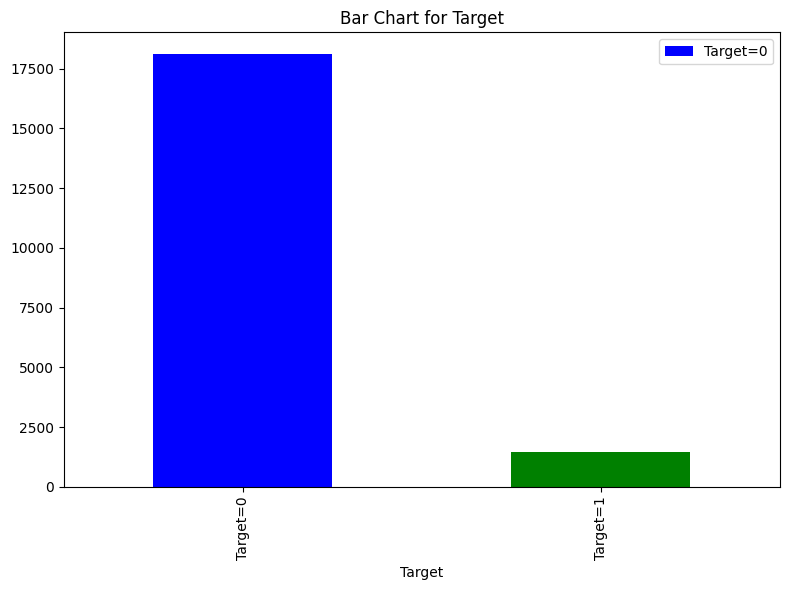

In [14]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

import matplotlib.pyplot as plt

# Create a figure with two subplots
plt.figure(figsize=(8, 6))

# # Plot the count of 'target' values equal to 1
# plt.subplot(2, 1, 1)
# data[data['target'] == 1]['target'].value_counts().plot(kind='bar', color='blue')
# plt.xlabel('Count for Target=1')
# plt.title('Bar Chart for Target=1')

# # Plot the count of 'target' values equal to 0
# plt.subplot(2, 1, 2)
# data[data['target'] == 0]['target'].value_counts().plot(kind='bar', color='green')
# plt.xlabel('Count for Target=0')
# plt.title('Bar Chart for Target=0')

ax = data['target'].value_counts().plot(kind='bar', color=['blue', 'green'])
ax.set_xticklabels(['Target=0', 'Target=1'])
ax.set_xlabel('Target')
ax.set_title('Bar Chart for Target')
ax.legend(['Target=0', 'Target=1'])
plt.tight_layout()
plt.show()


👇 How many observations of at-risk heartbeats are there? Save your answer as `at_risk_count`.

In [22]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

at_risk_count = data['target'].value_counts()[1]
at_risk_count

1448

👇 How many observations of healthy heartbeats are there? Save your answer as `healthy_count`.

In [23]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

healthy_count = data['target'].value_counts()[0]
healthy_count

18117

ℹ️ In certain cases, the class balance is representative of the true class distribution. This is the case here: the vast majority of people actually have healthy hearts. In such case, we preserve the class distribution inform the model on the reality, and adapt our modelling approach accordingly.

In [26]:
data.duplicated().sum()

0

In [31]:
data.isnull().sum().sort_values(ascending=False)

x_1       0
x_130     0
x_121     0
x_122     0
x_123     0
         ..
x_65      0
x_66      0
x_67      0
x_68      0
target    0
Length: 188, dtype: int64

### ☑️ Check your code

In [24]:
from nbresult import ChallengeResult

result = ChallengeResult('class_balance',
                         healthy = healthy_count,
                         at_risk = at_risk_count
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.2, pluggy-1.3.0 -- /Users/shiyunwa/anaconda3/envs/ese-msc/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shiyunwa/Documents/dsml4pe-student-pack-acse-sw5223/02-Evaluation-Metrics/01-Electrocardiograms/tests
plugins: anyio-3.5.0
collecting ... collected 2 items

test_class_balance.py::TestClass_balance::test_at_risk_count PASSED      [ 50%]
test_class_balance.py::TestClass_balance::test_healthy_count PASSED      [100%]

============================== 2 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/class_balance.pickle

git commit -m 'Completed class_balance step'

git push origin master



#  Logistic Regression

🎯 Your task is to flag heartbeats that are at risk of cardiovascular diseases.

👇 Let's start by investigating the performance of a `LogisticRegression` on that task. Use cross validation to evaluate the model on the following metrics:
- Accuracy
- Recall
- Precision
- F1

In [34]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

y = data['target']
X = data.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr_logistic = LogisticRegression(max_iter=5000)
lr_logistic.fit(X_train, y_train)
lr_cv = cross_validate(lr_logistic, X_train, y_train, cv=5,
                       scoring=['accuracy', 'recall', 'precision', 'f1'])

print('lr_cv:\n', lr_cv)
print('Accuracy:\n', lr_cv['test_accuracy'])
print('Recall:\n', lr_cv['test_recall'])
print('Precision:\n', lr_cv['test_precision'])
print('F1:\n', lr_cv['test_f1'])

print('Accuracy:\n', accuracy_score(y_test, lr_logistic.predict(X_test)))
print('Recall:\n', recall_score(y_test, lr_logistic.predict(X_test)))
print('Precision:\n', precision_score(y_test, lr_logistic.predict(X_test)))
print('F1:\n', f1_score(y_test, lr_logistic.predict(X_test)))

lr_cv:
 {'fit_time': array([0.43344307, 0.48908067, 0.57324529, 0.41434097, 0.41873813]), 'score_time': array([0.03420591, 0.01041913, 0.01108789, 0.01096892, 0.01133585]), 'test_accuracy': array([0.94267981, 0.93902884, 0.93026652, 0.93391749, 0.93136181]), 'test_recall': array([0.37378641, 0.32524272, 0.29126214, 0.31884058, 0.26086957]), 'test_precision': array([0.73333333, 0.70526316, 0.57142857, 0.62264151, 0.60674157]), 'test_f1': array([0.49517685, 0.44518272, 0.38585209, 0.42172524, 0.36486486])}
Accuracy:
 [0.94267981 0.93902884 0.93026652 0.93391749 0.93136181]
Recall:
 [0.37378641 0.32524272 0.29126214 0.31884058 0.26086957]
Precision:
 [0.73333333 0.70526316 0.57142857 0.62264151 0.60674157]
F1:
 [0.49517685 0.44518272 0.38585209 0.42172524 0.36486486]
Accuracy:
 0.9396933560477002
Recall:
 0.31490384615384615
Precision:
 0.655
F1:
 0.4253246753246753


❓ What is the model's ratio of correct predictions? Save your answer under variable name `correct_pred_ratio`.

In [40]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

correct_pred_ratio = lr_cv['test_accuracy'].mean() 

❓ What percentage of at-risk heartbeats is the model able to flag? Save your answer under variable name `flag_ratio`.

In [37]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

flag_ratio = lr_cv['test_recall'].mean()    

❓ When the model signals an at-risk heartbeat, how often is it correct? Save your answer under variable name `correct_detection_ratio`.

In [38]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

correct_detection_ratio = lr_cv['test_precision'].mean()

❓ What is the model's ability to flag as many at-risk heartbeats as possible while limiting false alarms?  Save your answer under variable name `aggregated_metric`.

In [41]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

aggregated_metric = lr_cv['test_f1'].mean()

ℹ️ By observing the different metrics, you should see that accuracy is deceiving. To understand what is going on, we can observe a breakdown of the model's predictions in a confusion matrix.

### ☑️ Check your code

In [42]:
from nbresult import ChallengeResult

result = ChallengeResult('logistic_regression_evaluation',
                         accuracy = correct_pred_ratio,
                         recall = flag_ratio,
                         precision = correct_detection_ratio,
                         f1 = aggregated_metric
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.2, pluggy-1.3.0 -- /Users/shiyunwa/anaconda3/envs/ese-msc/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shiyunwa/Documents/dsml4pe-student-pack-acse-sw5223/02-Evaluation-Metrics/01-Electrocardiograms/tests
plugins: anyio-3.5.0
collecting ... collected 4 items

test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_accuracy PASSED [ 25%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_f1 PASSED [ 50%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_precision PASSED [ 75%]
test_logistic_regression_evaluation.py::TestLogistic_regression_evaluation::test_recall PASSED [100%]

============================== 4 passed in 0.70s ===============================


💯 You can commit your code:

git add tests/logistic_regression_evaluation.pickle

git commit -m 'Completed logist

# Confusion Matrix

👇 Using `ConfusionMatrixDisplay` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)),  visualize the predictions breakdown of the Logistic Regression model.

<details>
<summary>💡 Hints</summary>

- `ConfusionMatrixDisplay` can be used straight from an estimator using the <code>from_estimator</code> method: see the documentation for details. 
    
- As inputs you will need a **trained model** and **test data**
    
- You'll need to go back to the **Holdout method!** You can use Sklearn's `train_test_split()` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html))
    
- Look into the `normalize` parameter
  
</details>



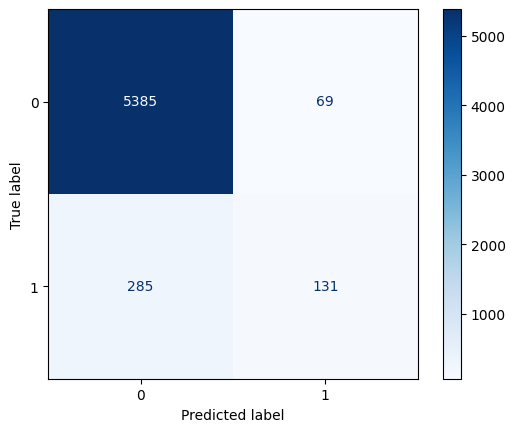

In [43]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, lr_logistic.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_logistic.classes_)
disp.plot(cmap='Blues')
plt.show()


ℹ️ The confusion matrix should show that the model is influenced by the class imbalance: it predicts heartbeats to be healthy most of the time. Due to this behaviour, the model is often correct and has a high accuracy. However, it causes it to miss out on many at risk heartbeats: it has a bad recall.

👉 This model is therefore poor at the task of **flagging at-risk observations**.

⚠️ Don't be fooled by the accuracy and look at the metric that corresponds to your task! ⚠️

# KNN Classifier

👇 Would a default KNN classifier perform better at the task of flagging at-risk observations?

Save the you answer under `best_model` as "KNN" or "LogisticRegression".

In [50]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_cv = cross_validate(knn, X_train, y_train, cv=5,
                        scoring=['accuracy', 'recall', 'precision', 'f1'])

print('knn_cv:\n', knn_cv)
print('Accuracy:\n', knn_cv['test_accuracy'])
print('Recall:\n', knn_cv['test_recall'])
print('Precision:\n', knn_cv['test_precision'])
print('F1:\n', knn_cv['test_f1'])

best_model = 'KNN'


knn_cv:
 {'fit_time': array([0.01118803, 0.01255822, 0.01708269, 0.01627707, 0.01662326]), 'score_time': array([0.20557022, 0.33785892, 0.27426124, 0.31089091, 0.32559371]), 'test_accuracy': array([0.98503103, 0.98576123, 0.98138007, 0.98138007, 0.98612632]), 'test_recall': array([0.84466019, 0.86407767, 0.82524272, 0.81642512, 0.85990338]), 'test_precision': array([0.95081967, 0.94179894, 0.91891892, 0.92857143, 0.95187166]), 'test_f1': array([0.89460154, 0.90126582, 0.86956522, 0.8688946 , 0.9035533 ])}
Accuracy:
 [0.98503103 0.98576123 0.98138007 0.98138007 0.98612632]
Recall:
 [0.84466019 0.86407767 0.82524272 0.81642512 0.85990338]
Precision:
 [0.95081967 0.94179894 0.91891892 0.92857143 0.95187166]
F1:
 [0.89460154 0.90126582 0.86956522 0.8688946  0.9035533 ]


### ☑️ Check your code

In [51]:
from nbresult import ChallengeResult

result = ChallengeResult('best_model',
                         model = best_model,
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.2, pluggy-1.3.0 -- /Users/shiyunwa/anaconda3/envs/ese-msc/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shiyunwa/Documents/dsml4pe-student-pack-acse-sw5223/02-Evaluation-Metrics/01-Electrocardiograms/tests
plugins: anyio-3.5.0
collecting ... collected 1 item

test_best_model.py::TestBest_model::test_best_model PASSED               [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/best_model.pickle

git commit -m 'Completed best_model step'

git push origin master



# Classification Report

Now that we know the KNN model has the best recall, let's check out its performance accross all the other classification metrics.

👇 Print out a `classification_report` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)) of the KNN model.

<details>
<summary> 💡 Hint  </summary>
    
You'll need to pass model predictions to `classification_report`. Sklearn's `cross_val_predict` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)) might help 😉
</details>




In [55]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

from sklearn.metrics import classification_report

report = classification_report(y_test, knn.predict(X_test))
print(report)

report_dict = classification_report(y_test, knn.predict(X_test), output_dict=True)
print(report_dict)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5454
           1       0.93      0.83      0.88       416

    accuracy                           0.98      5870
   macro avg       0.96      0.91      0.93      5870
weighted avg       0.98      0.98      0.98      5870

{'0': {'precision': 0.9872657813352738, 'recall': 0.995049504950495, 'f1-score': 0.9911423614281801, 'support': 5454.0}, '1': {'precision': 0.9276139410187667, 'recall': 0.8317307692307693, 'f1-score': 0.8770595690747782, 'support': 416.0}, 'accuracy': 0.9834752981260647, 'macro avg': {'precision': 0.9574398611770203, 'recall': 0.9133901370906321, 'f1-score': 0.9341009652514791, 'support': 5870.0}, 'weighted avg': {'precision': 0.9830383255309012, 'recall': 0.9834752981260647, 'f1-score': 0.9830574480348214, 'support': 5870.0}}


❓ Looking at the classification report, what is the model's ratio of correctly predicted at-risk heartbeats? Save your answer as a float under `correct_atrisk_predictions`

In [60]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

correct_atrisk_predictions = report_dict['1']['precision']
correct_atrisk_predictions

0.9276139410187667

### ☑️ Check your code

In [61]:
from nbresult import ChallengeResult

result = ChallengeResult('precision',
                         precision = correct_atrisk_predictions,
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.2, pluggy-1.3.0 -- /Users/shiyunwa/anaconda3/envs/ese-msc/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shiyunwa/Documents/dsml4pe-student-pack-acse-sw5223/02-Evaluation-Metrics/01-Electrocardiograms/tests
plugins: anyio-3.5.0
collecting ... collected 1 item

test_precision.py::TestPrecision::test_precision PASSED                  [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/precision.pickle

git commit -m 'Completed precision step'

git push origin master



# Prediction

🎯 A patient comes to you for a second opinion on what he was told may be an at risk heartbeat.  The data is saved as 'electrocardiograms_new_patient.csv' under data.


❓ According to your optimal model, is he at risk or not?  

Save the prediction of your model under variable name `prediction` as "at risk" or "healthy".

In [72]:
# ADD YOUR CODE HERE -- You can create new markdown and code cells

data_patient = pd.read_csv('raw_data/electrocardiograms_new_patient.csv')

# get X_pred from the new csv file with only features
X_pred = data_patient.values

category = knn.predict(X_pred)
prob = knn.predict_proba(X_pred)

if category == 1:
    prediction = 'at risk'
elif category == 0:
    prediction = 'healthy'

print(category)
print(prob)

[1]
[[0. 1.]]


/Users/shiyunwa/anaconda3/envs/ese-msc/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/shiyunwa/anaconda3/envs/ese-msc/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


### ☑️ Check your code

In [71]:
from nbresult import ChallengeResult

result = ChallengeResult('prediction',
                         prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.5, pytest-7.4.2, pluggy-1.3.0 -- /Users/shiyunwa/anaconda3/envs/ese-msc/bin/python3
cachedir: .pytest_cache
rootdir: /Users/shiyunwa/Documents/dsml4pe-student-pack-acse-sw5223/02-Evaluation-Metrics/01-Electrocardiograms/tests
plugins: anyio-3.5.0
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction_at_risk PASSED       [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



# 🏁